In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [76]:
# load the given dataset 
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\ML project 6\Red Wine.csv")

In [78]:
df.head()

,Quality_Category,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
0,0,0.30,0.34,1.6,0.049,14,132,0.994,0.49,9.5
1,0,0.23,0.32,8.5,0.058,47,186,0.996,0.40,9.9
2,0,0.28,0.40,6.9,0.050,30,97,0.995,0.44,10.1
3,0,0.32,0.16,7.0,0.045,30,136,0.995,0.47,9.6
4,0,0.27,0.36,20.7,0.045,45,170,1.001,0.45,8.8


In [80]:
#  information from dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Quality_Category    4894 non-null   int64  
 1   volatileacidity     4894 non-null   float64
 2   citricacid          4894 non-null   float64
 3   residualsugar       4894 non-null   float64
 4   chlorides           4894 non-null   float64
 5   freesulfurdioxide   4894 non-null   int64  
 6   totalsulfurdioxide  4894 non-null   int64  
 7   density             4894 non-null   float64
 8   sulphates           4894 non-null   float64
 9   alcohol             4894 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 382.5 KB


In [82]:
df.describe()

,Quality_Category,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,sulphates,alcohol
count,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000,4894.000000
mean,0.216387,0.278335,0.334146,6.391582,0.045773,35.311606,138.368615,0.994048,0.489904,10.514610
std,0.411823,0.100801,0.121047,5.071695,0.021855,17.019553,42.498278,0.003007,0.114153,1.230665
min,0.000000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987000,0.220000,8.000000
25%,0.000000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.992000,0.410000,9.500000
50%,0.000000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.994000,0.470000,10.400000
75%,0.000000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996000,0.550000,11.400000
max,1.000000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.039000,1.080000,14.200000


In [84]:
#  describe the dataset
df.columns

Index(['Quality_Category', 'volatileacidity', 'citricacid', 'residualsugar',
       'chlorides', 'freesulfurdioxide', 'totalsulfurdioxide', 'density',
       'sulphates', 'alcohol'],
      dtype='object')

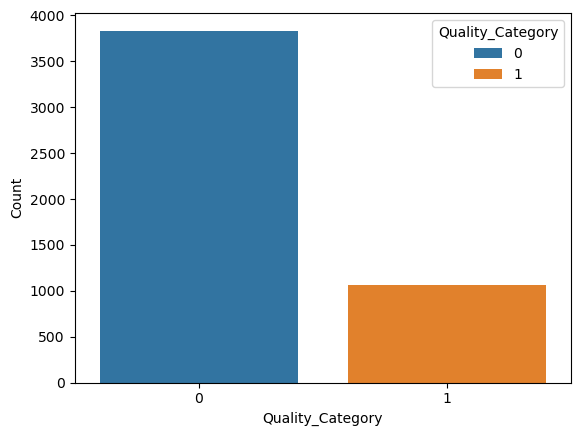

In [88]:
# the barchart of Quality_Category value counts
sns.countplot(data=df,x="Quality_Category",hue = "Quality_Category",)
plt.xlabel("Quality_Category")
plt.ylabel("Count")
plt.show()

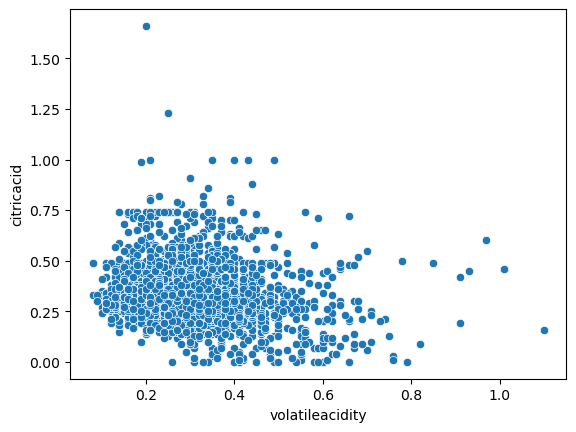

In [9]:
# scatter plot between volatileacidity & citricacid
sns.scatterplot(data=df,x="volatileacidity",y = "citricacid",legend=True)
plt.xlabel("volatileacidity")
plt.ylabel("citricacid")
plt.show()

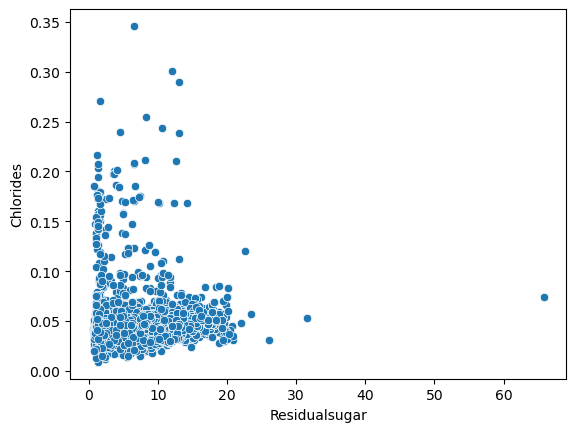

In [10]:
# scatter plot between residualsuger & chlorides 
sns.scatterplot(data=df,x="residualsugar",y = "chlorides",legend=True)
plt.xlabel("Residualsugar")
plt.ylabel("Chlorides")
plt.show()

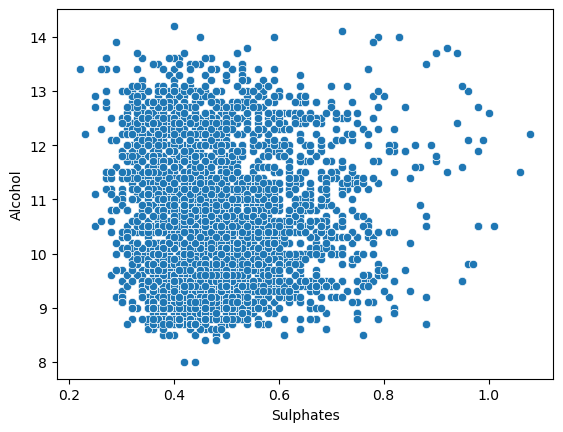

In [11]:
#  scatterplot between sulphates and alcohol 
sns.scatterplot(data=df,x="sulphates",y = "alcohol",legend=True)
plt.xlabel("Sulphates")
plt.ylabel("Alcohol")
plt.show()

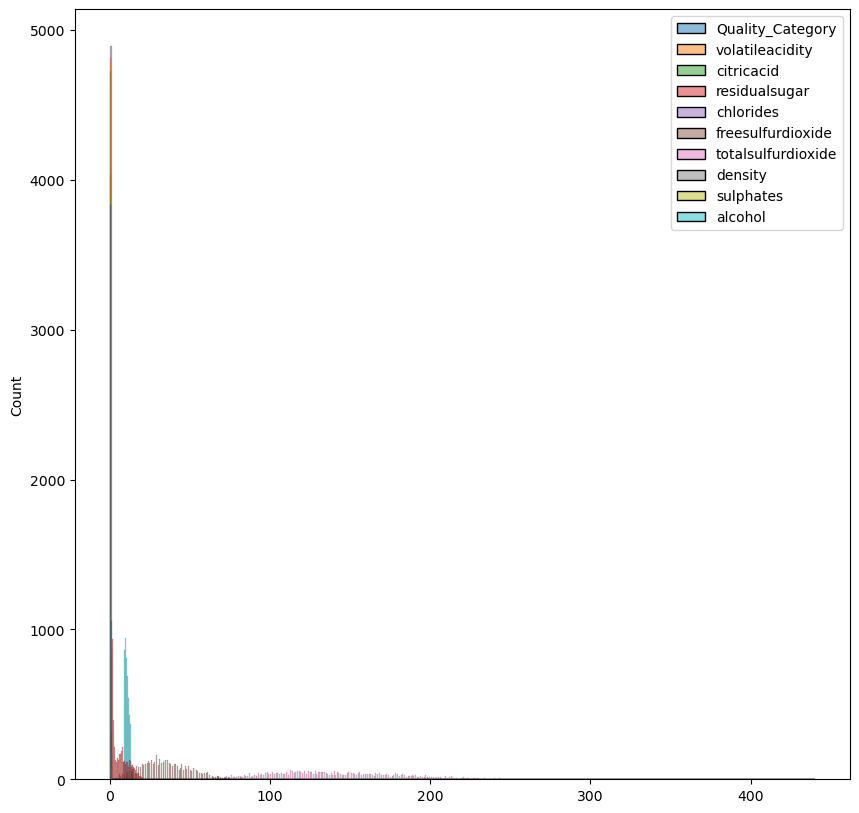

In [12]:
#  histplot of dataset 
plt.figure(figsize=(10,10))
sns.histplot(data=df)
plt.show()

In [13]:
# the null values 
df.isnull().sum()

Quality_Category      0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
sulphates             0
alcohol               0
dtype: int64

In [14]:
#  create features and target data
x = df.drop("Quality_Category",axis=1)
y = df["Quality_Category"]

In [15]:
# split into training and testing 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
# apply support vector machine
model = SVC()
model.fit(x_train,y_train)

SVC()

In [17]:
y_pred = model.predict(x_test)

In [18]:
print("Train score",model.score(x_train,y_train)*100)
print("Test score",model.score(x_test,y_test)*100)
print("Accuracy score",accuracy_score(y_test,y_pred)*100)

Train score 78.3397190293742
Test score 78.44739530132789
Accuracy score 78.44739530132789


with parameter c = 100

In [20]:
model_100 = SVC(C=100)
model_100.fit(x_train,y_train)

SVC(C=100)

In [21]:
y_pred = model_100.predict(x_test)

In [22]:
print("Train score",model_100.score(x_train,y_train)*100)
print("Test score",model_100.score(x_test,y_test)*100)
print("Accuracy score",accuracy_score(y_test,y_pred)*100)

Train score 78.3397190293742
Test score 78.44739530132789
Accuracy score 78.44739530132789


 with parameter c = 3

In [24]:
model_3 = SVC(C=3)
model_3.fit(x_train,y_train)

SVC(C=3)

In [25]:
y_pred = model_3.predict(x_test)

In [26]:
print("Train score",model_3.score(x_train,y_train)*100)
print("Test score",model_3.score(x_test,y_test)*100)
print("Accuracy score",accuracy_score(y_test,y_pred)*100)

Train score 78.3397190293742
Test score 78.44739530132789
Accuracy score 78.44739530132789


with parameter c = 4

In [28]:
model_4 = SVC(C=4)
model_4.fit(x_train,y_train)

SVC(C=4)

In [29]:
y_pred = model_4.predict(x_test)

In [30]:
print("Train score",model_4.score(x_train,y_train)*100)
print("Test score",model_4.score(x_test,y_test)*100)
print("Accuracy score",accuracy_score(y_test,y_pred)*100)

Train score 78.3397190293742
Test score 78.44739530132789
Accuracy score 78.44739530132789


 with parameter c = 5

In [32]:
model_5= SVC(C=5)
model_5.fit(x_train,y_train)

SVC(C=5)

In [33]:
y_pred = model_5.predict(x_test)

In [34]:
print("Train score",model_5.score(x_train,y_train)*100)
print("Test score",model_5.score(x_test,y_test)*100)
print("Accuracy score",accuracy_score(y_test,y_pred)*100)

Train score 78.3397190293742
Test score 78.44739530132789
Accuracy score 78.44739530132789


In [ ]:
df.